# Ensemble methods

In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import warnings; warnings.simplefilter('ignore')

# load data
digits = load_digits()
X = digits.data
y = digits.target
X /= X.max()
 
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


//anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Let's look at accuracy as a function of the number of trees used in the ensemble:


In [2]:
n_estimators = [10, 20, 50, 100, 250, 500, 1000]
accuracy = []
for estimators in n_estimators :
    print ("num estimators: ", estimators)
    classifier = RandomForestClassifier(n_estimators=estimators)
    results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
    accuracy.append(np.mean(results['test_score']))
 

num estimators:  10
num estimators:  20
num estimators:  50
num estimators:  100
num estimators:  250
num estimators:  500
num estimators:  1000


Text(0.5,1,'performance of random forests on the digits data')

Text(0.5,0,'number of trees')

Text(0,0.5,'accuracy')

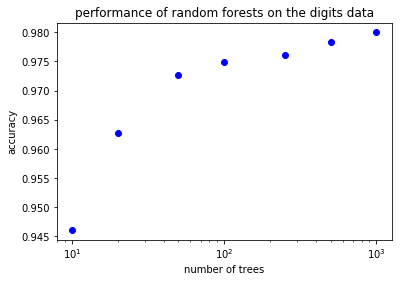

In [3]:
import matplotlib.pyplot as plt
plt.semilogx(n_estimators, accuracy, 'ob')
plt.title('performance of random forests on the digits data')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.show()
 

Compared to a single decision tree:

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=None)
results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(results['test_score'])


0.84981986131845166

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
n_estimators = [10, 20, 50, 100, 250, 500, 1000]
accuracy_bagging = []
accuracy_adaboost = []
for estimators in n_estimators :
    print ("num estimators: ", estimators)
    classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=estimators, random_state=0)
    results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
    accuracy_bagging.append(np.mean(results['test_score']))
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=estimators)
    results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
    accuracy_adaboost.append(np.mean(results['test_score']))



num estimators:  10
num estimators:  20
num estimators:  50
num estimators:  100
num estimators:  250
num estimators:  500
num estimators:  1000


Text(0.5,1,'performance of ensemble methods on the digits data')

Text(0.5,0,'number of trees')

Text(0,0.5,'accuracy')

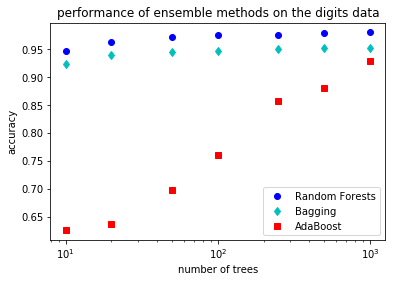

In [6]:
plt.semilogx(n_estimators, accuracy, 'ob', label='Random Forests')
plt.semilogx(n_estimators, accuracy_bagging, 'dc', label='Bagging')
plt.semilogx(n_estimators, accuracy_adaboost, 'sr', label='AdaBoost')
plt.legend()
plt.title('performance of ensemble methods on the digits data')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.show()

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
 
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
 ]
classifier = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid)
results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(results['test_score'])


//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.99166603238065887

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       185
           1       0.83      0.79      0.81       192
           2       0.85      0.83      0.84       183
           3       0.82      0.82      0.82       182
           4       0.83      0.86      0.85       176
           5       0.90      0.87      0.88       187
           6       0.92      0.96      0.94       174
           7       0.90      0.90      0.90       178
           8       0.74      0.74      0.74       174
           9       0.76      0.83      0.79       166

   micro avg       0.85      0.85      0.85      1797
   macro avg       0.85      0.85      0.85      1797
weighted avg       0.85      0.85      0.85      1797



Text(0.5,20.7222,'true label')

Text(127.222,0.5,'predicted label')

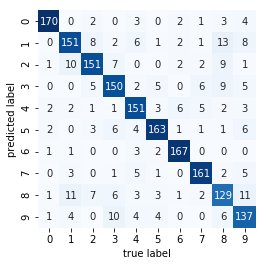

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

classifier = RandomForestClassifier(n_estimators=100)
classifier = DecisionTreeClassifier(max_depth=None)
y_pred = cross_val_predict(classifier, X, y, cv=cv_generator)
print(metrics.classification_report(y_pred, y))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_pred)

import seaborn as sns
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
